Importing modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Read hourly data (hour.csv)

In [2]:
hourly_data = pd.read_csv('hour.csv')

Finding out the size of the data (rows, cols) & whether there are missing values

In [5]:
print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data:{hourly_data.isnull().sum().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data:0


Doing some stats

In [6]:
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


Creating a copy of the dataset

In [7]:
preprocessed_data = hourly_data.copy()

Mapping the numerical season variables (1,2,3,4) to categorical ones (Winter, Spring, Summer, Fall)

In [8]:
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])

Doing the same for year

In [9]:
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])

Doing the same for weekdays

In [10]:
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'} 
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])

Doing the same for weather conditions

In [11]:
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weather_mapping[x])

Doing the same for humidity & windspeed

In [12]:
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']*67

Visualisation of a random sample

In [14]:
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


# ANALYSING THE DATA 

Checking whether casual plus register rides equal total rides using assert function

In [15]:
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(), \
'Sum of casual and registered rides not equal to total number of rides'

Seaborn to visualise the distribution of the registered and casual rides

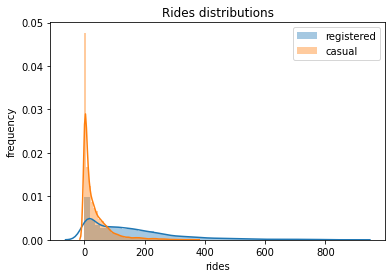

In [16]:
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.ylabel("frequency")
plt.title("Rides distributions")
plt.savefig('rides_distributions.png', format='png')

Analysing the number of rides each day

/home/laptop/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


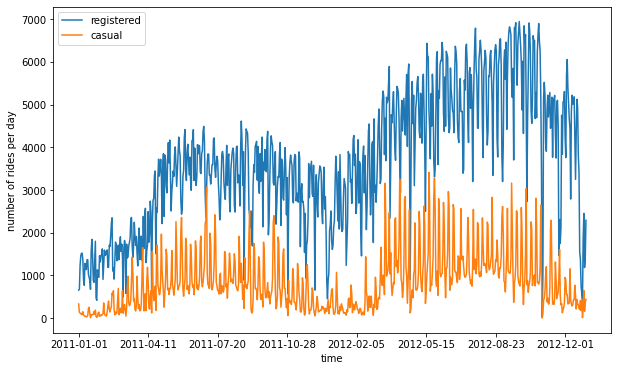

In [17]:
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6)); ax.set_xlabel("time"); ax.set_ylabel("number of rides per day")
plt.savefig('rides_daily.png', format='png')